In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import the csv data as pandas dataframe

In [4]:
df = pd.read_csv('data/raw.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [11]:
numeric_features = [features for features in df.columns if df[features].dtype != 'O']
categorical_features = [features for features in df.columns if df[features].dtype == 'O']
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [12]:
df['total_score'] = df['math_score']+df['writing_score']+df['reading_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [13]:
writing_full = df[df['writing_score']==100]['average'].count()
reading_full = df[df['reading_score']==100]['average'].count()
maths_full = df[df['math_score']==100]['average'].count()

print(f'Number of students with full marks in Maths: {maths_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [14]:
writing_full = df[df['writing_score']<=20]['average'].count()
reading_full = df[df['reading_score']<=20]['average'].count()
maths_full = df[df['math_score']<=20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {maths_full}')
print(f'Number of students with less than 20 in Writing: {writing_full}')
print(f'Number of students with less than 20 in Reading: {reading_full}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 in Writing: 3
Number of students with less than 20 in Reading: 1


Histogram & KDE

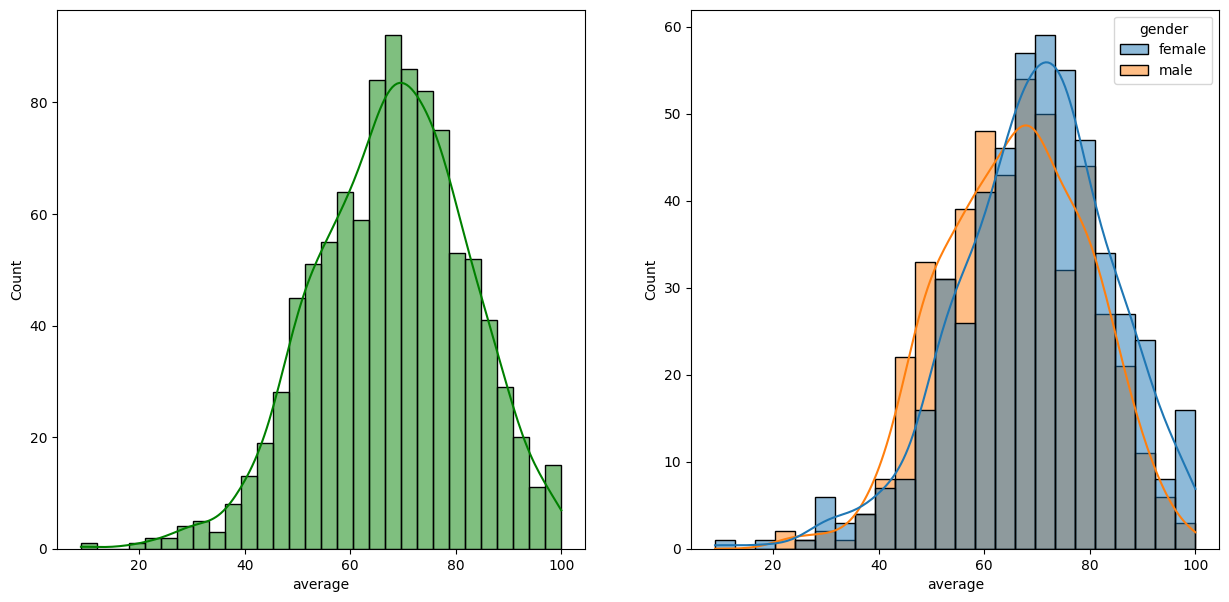

In [16]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df ,x= 'average' ,kde= True ,bins= 30 ,color= 'g')
plt.subplot(122)
sns.histplot(data= df ,x= 'average' ,kde= True ,hue= 'gender')
plt.show()

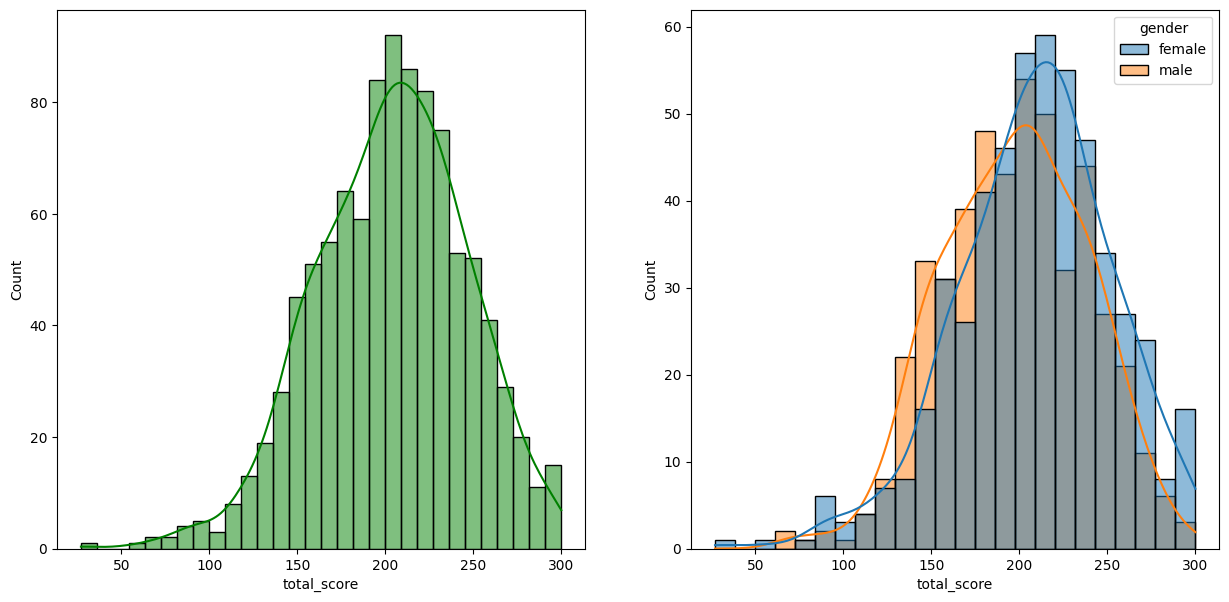

In [18]:
plt.subplots(1,2, figsize= (15,7))
plt.subplot(121)
sns.histplot(data= df, x= 'total_score', bins= 30, kde= True, color= 'g' )
plt.subplot(122)
sns.histplot(data= df, x= 'total_score', kde= 'True', hue= 'gender')
plt.show()

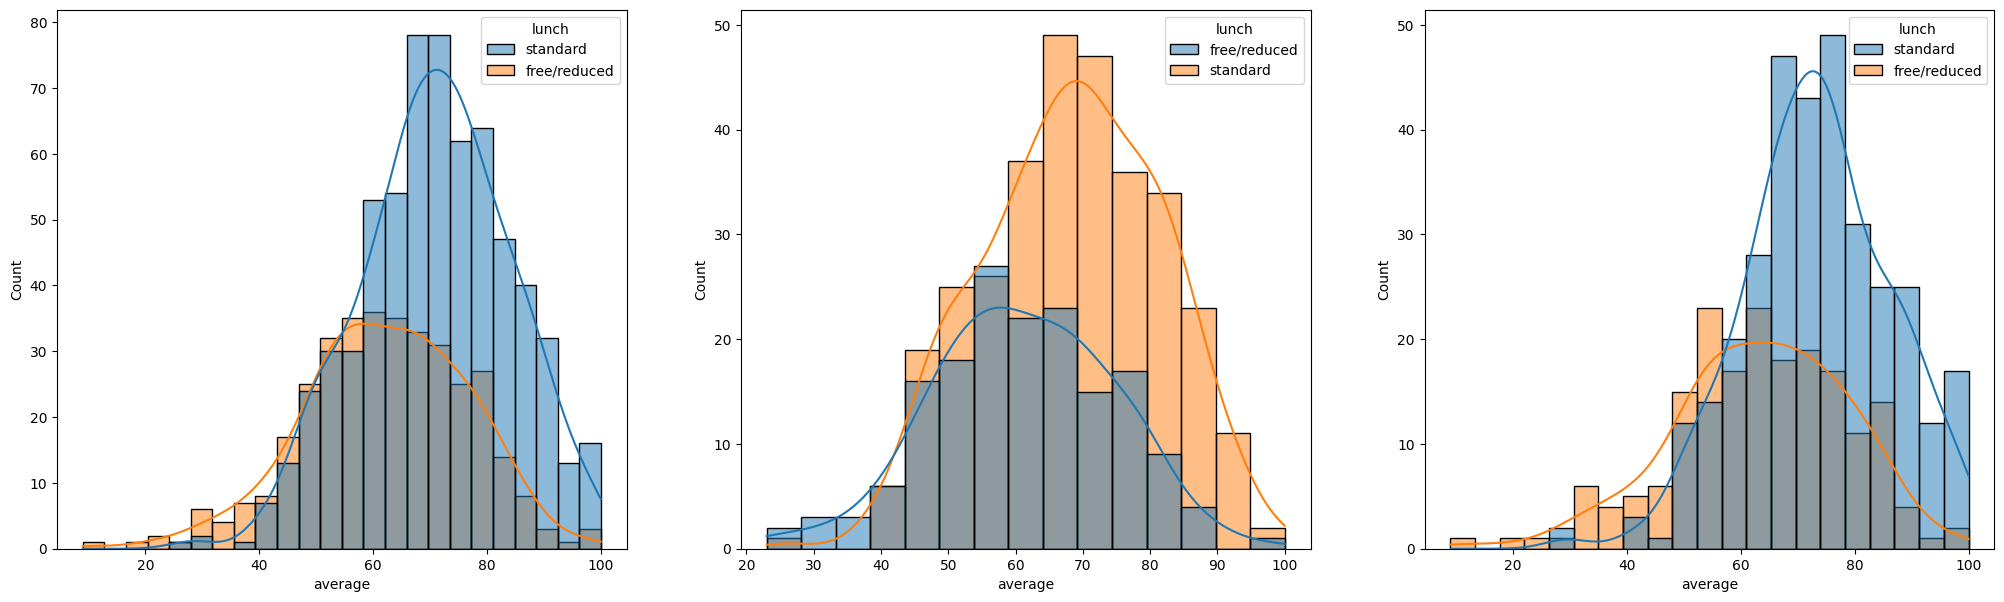

In [25]:
plt.subplots(1,3, figsize= (25,7))
plt.subplot(131)
sns.histplot(data= df, x= 'average', kde= True, hue= 'lunch')
plt.subplot(132)
sns.histplot(data= df[df['gender']=='male'] ,x= 'average', kde= True, hue= 'lunch')
plt.subplot(133)
sns.histplot(data= df[df['gender']=='female'] ,x= 'average', kde= True, hue= 'lunch')
plt.show()

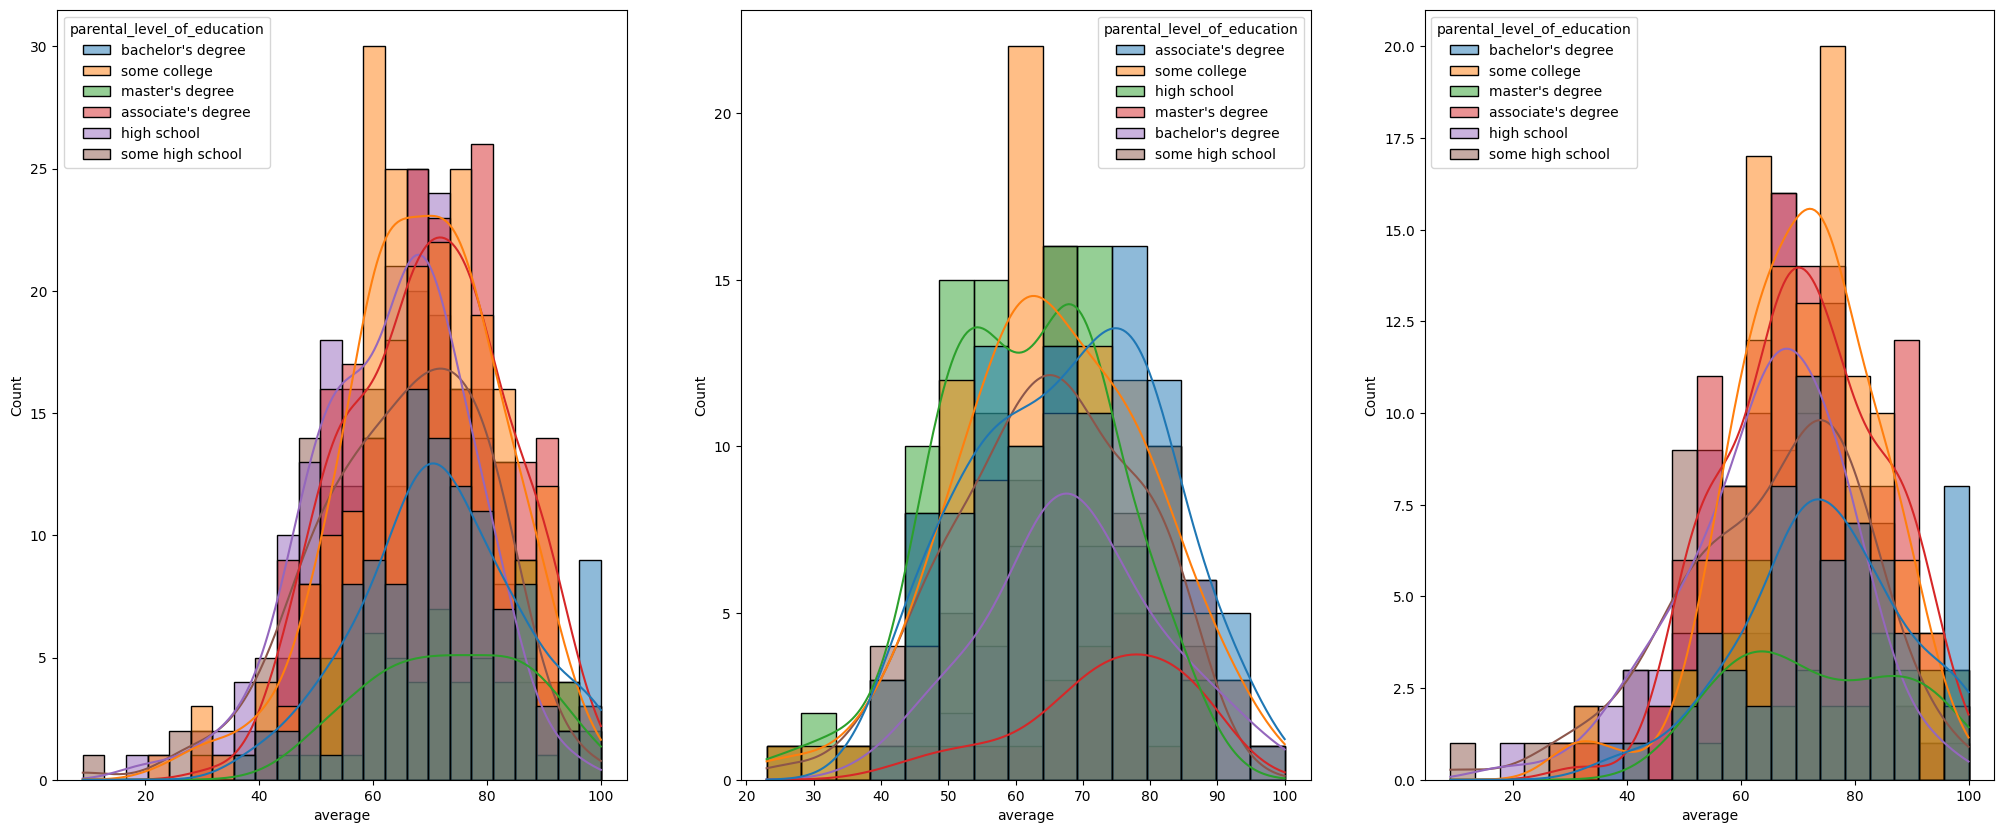

In [29]:
plt.subplots(1,3,figsize=(25,10))
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

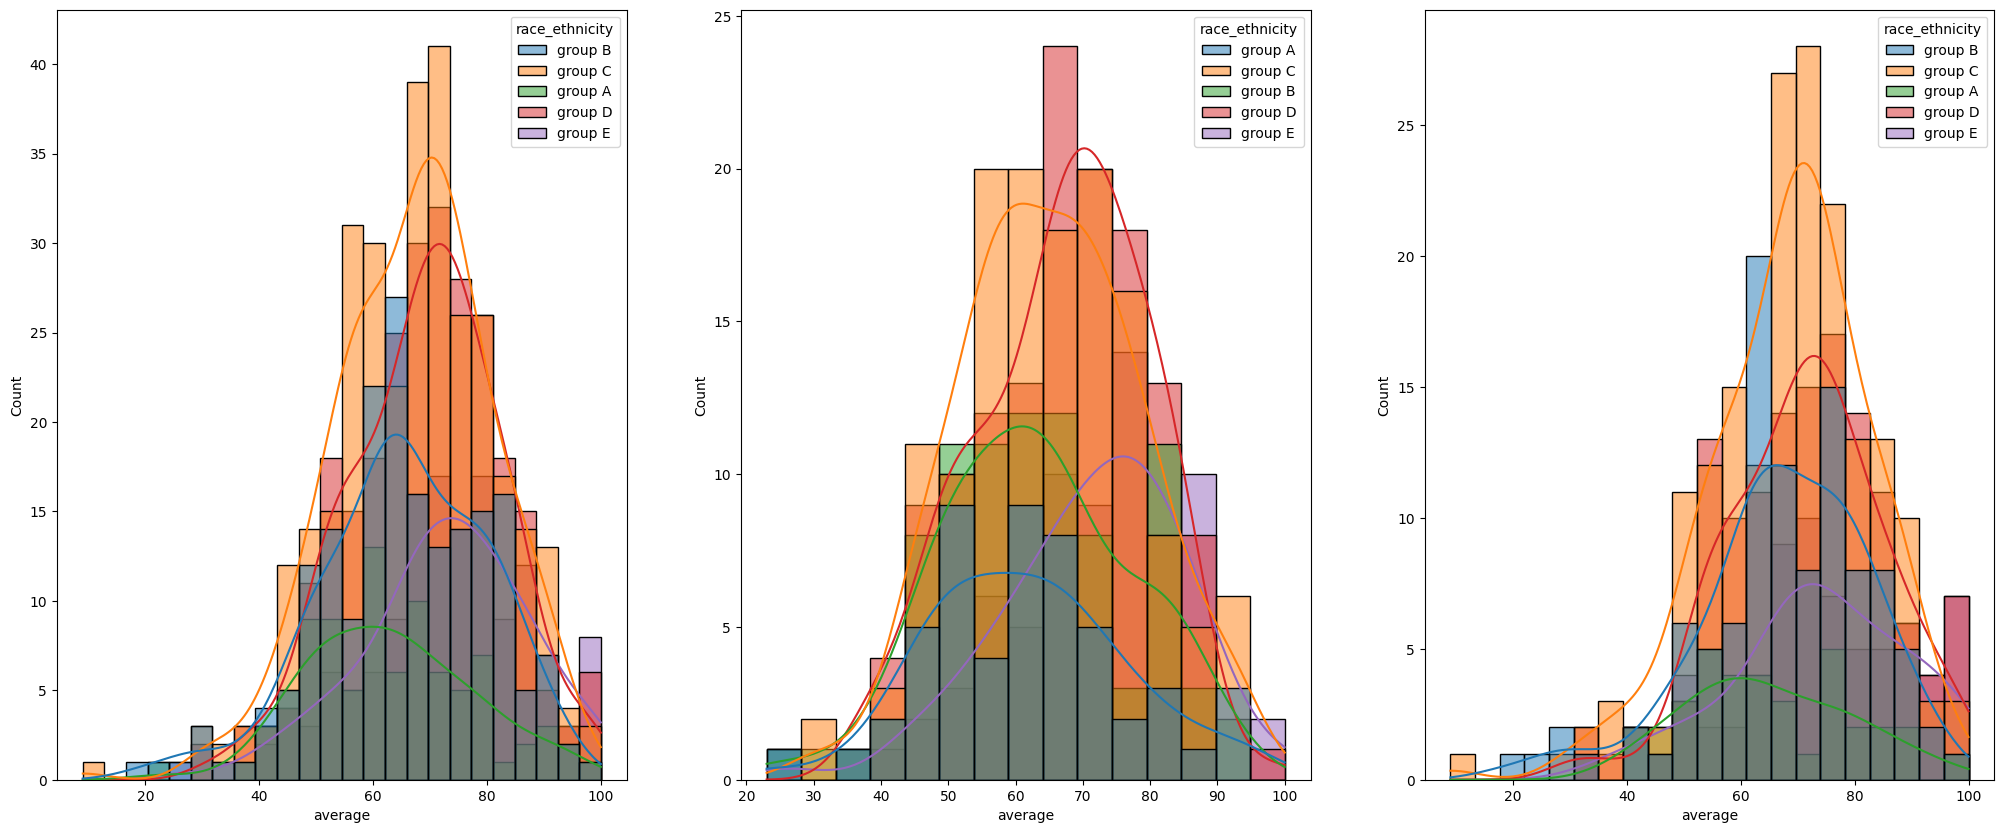

In [30]:
plt.subplots(1,3,figsize=(25,10))
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.show()

<Axes: title={'center': 'WRITING-SCORE'}, xlabel='writing_score'>

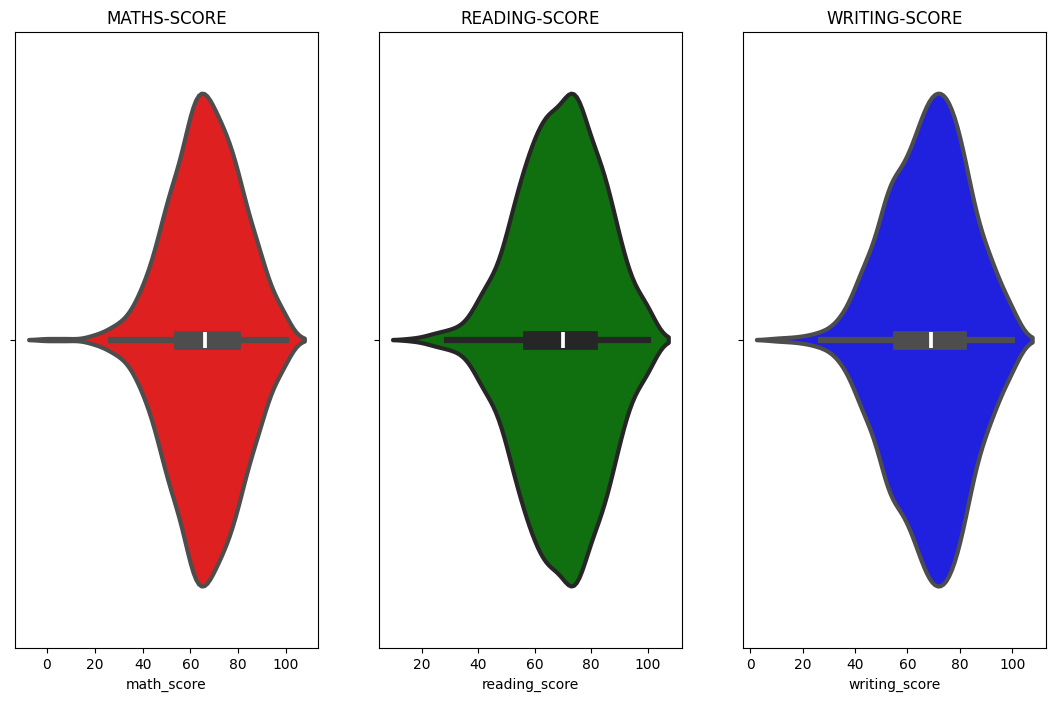

In [33]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('MATHS-SCORE')
sns.violinplot(x= 'math_score', data= df, color= 'red', linewidth= 3)
plt.subplot(1,4,2)
plt.title('READING-SCORE')
sns.violinplot(x= 'reading_score', data= df, color= 'green', linewidth= 3)
plt.subplot(1,4,3)
plt.title('WRITING-SCORE')
sns.violinplot(x= 'writing_score', data= df, color= 'blue', linewidth= 3)

Multivariate analysis using pieplot

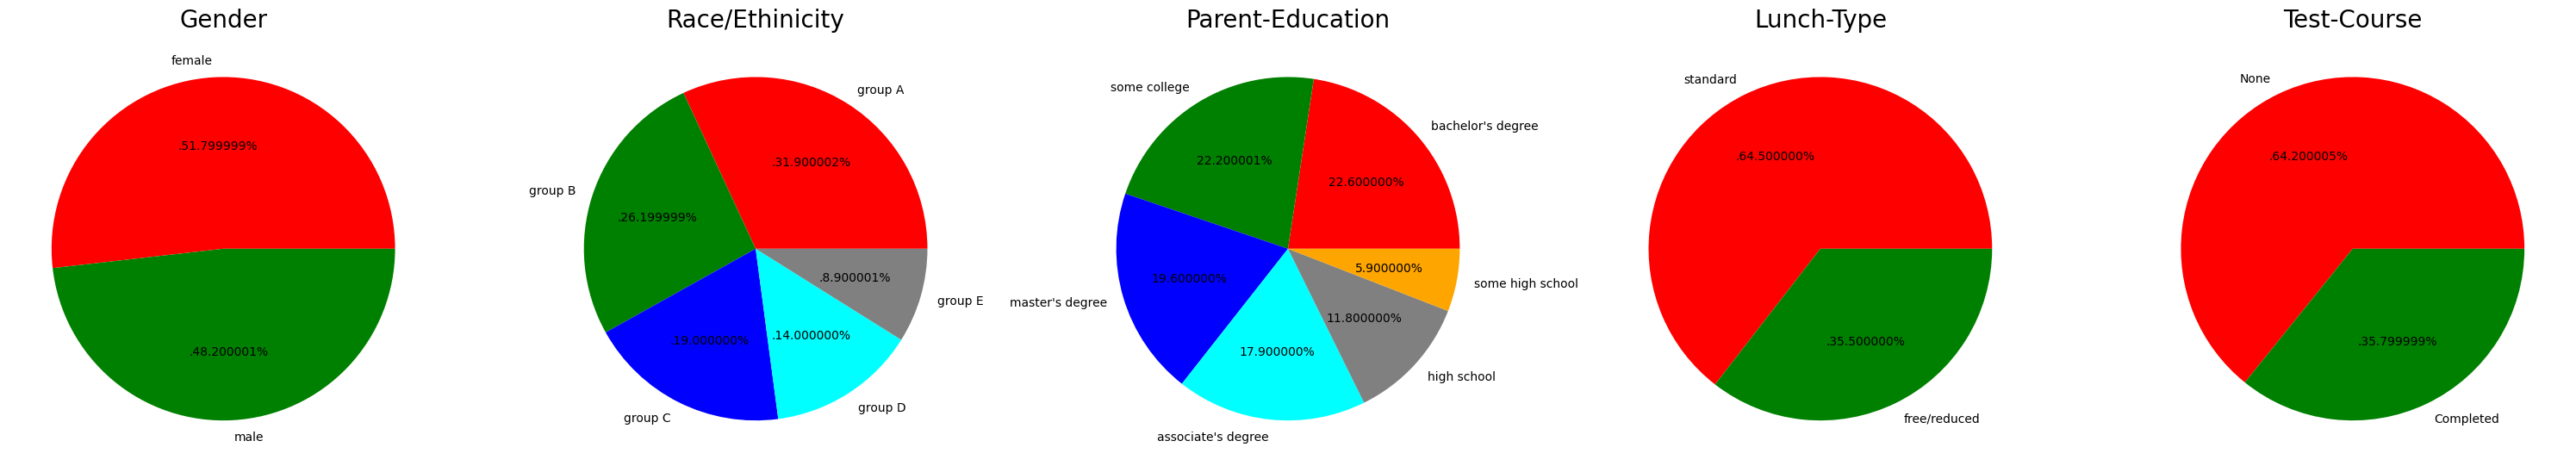

In [55]:
plt.rcParams['figure.figsize'] = (30, 12)
plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = ['female','male']
color = ['red','green']

plt.pie(size, labels= labels, colors= color, autopct= '.%2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')

plt.subplot(1,5,2)
size = df['race_ethnicity'].value_counts()
labels = ['group A','group B','group C','group D','group E']
color = ['red','green','blue','cyan','grey']

plt.pie(size, labels= labels, colors= color, autopct= '.%2f%%')
plt.title('Race/Ethinicity',fontsize=20)
plt.axis('off')

plt.subplot(1,5,3)
size = df['parental_level_of_education'].value_counts()
labels = ["bachelor's degree",'some college',"master's degree","associate's degree",'high school','some high school']
color = ['red','green','blue','cyan','grey','orange']

plt.pie(size, labels= labels, colors= color, autopct= '%2f%%')
plt.title('Parent-Education',fontsize=20)
plt.axis('off')

plt.subplot(1,5,4)
size = df['lunch'].value_counts()
labels = ['standard','free/reduced']
color = ['red','green']

plt.pie(size, labels= labels, colors= color, autopct= '.%2f%%')
plt.title('Lunch-Type',fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['test_preparation_course'].value_counts()
labels = ['None', 'Completed']
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test-Course', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()

UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

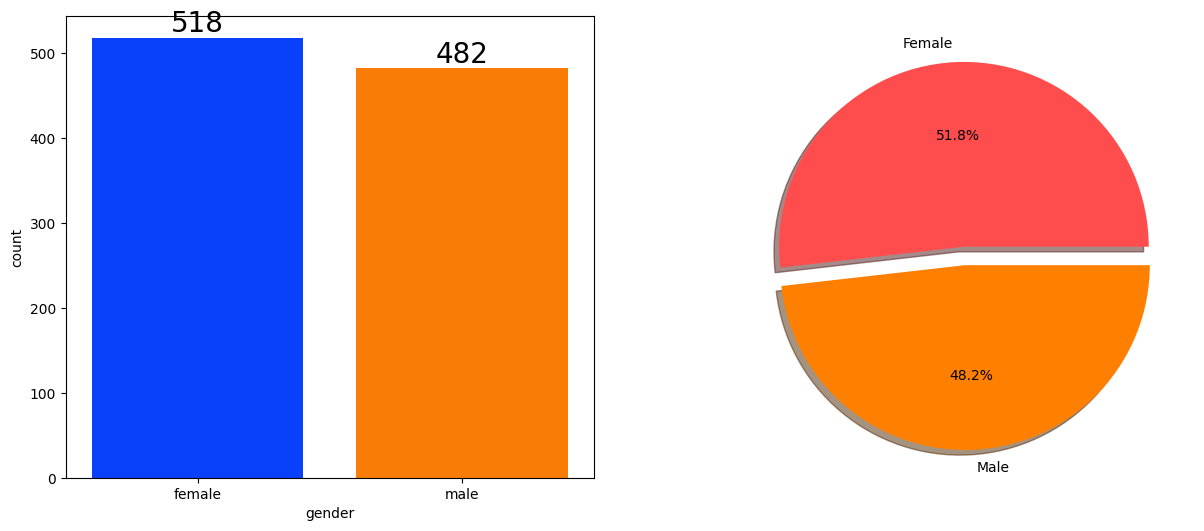

In [46]:
f, ax = plt.subplots(1,2, figsize=(15,6))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Female','Male'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])

plt.show()

BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [58]:
gender_group = df.groupby('gender')
gender_group

In [59]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

IndexError: Column(s) average already selected

<Figure size 1000x800 with 0 Axes>

RACE/EHNICITY COLUMN
How is Group wise distribution ?
Is Race/Ehnicity has any impact on student's performance ?
UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

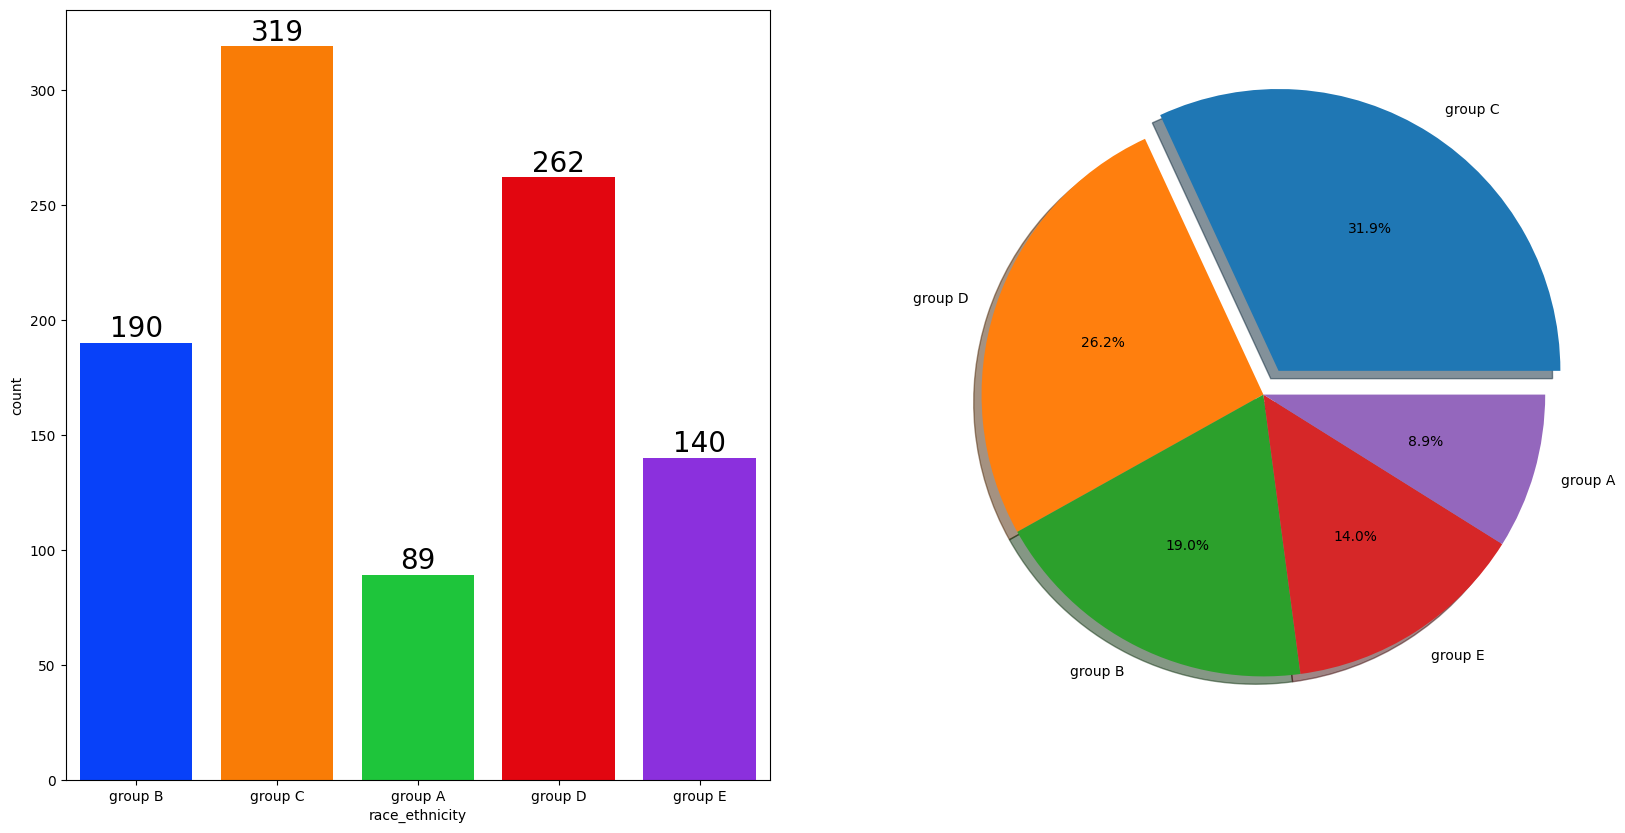

In [62]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()  

BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

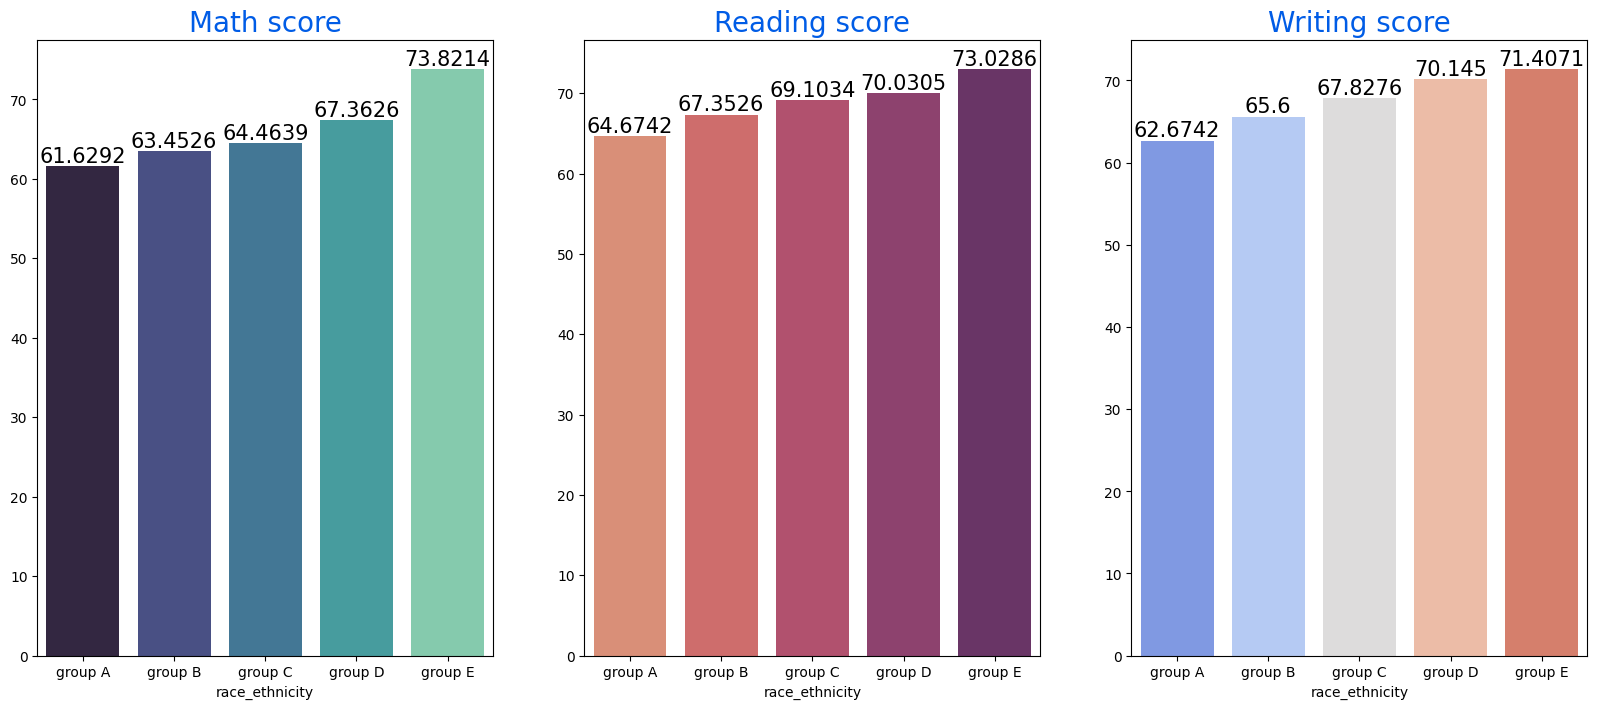

In [63]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15) 

 PARENTAL LEVEL OF EDUCATION COLUMN
What is educational background of student's parent ?
Is parental education has any impact on student's performance ?
UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

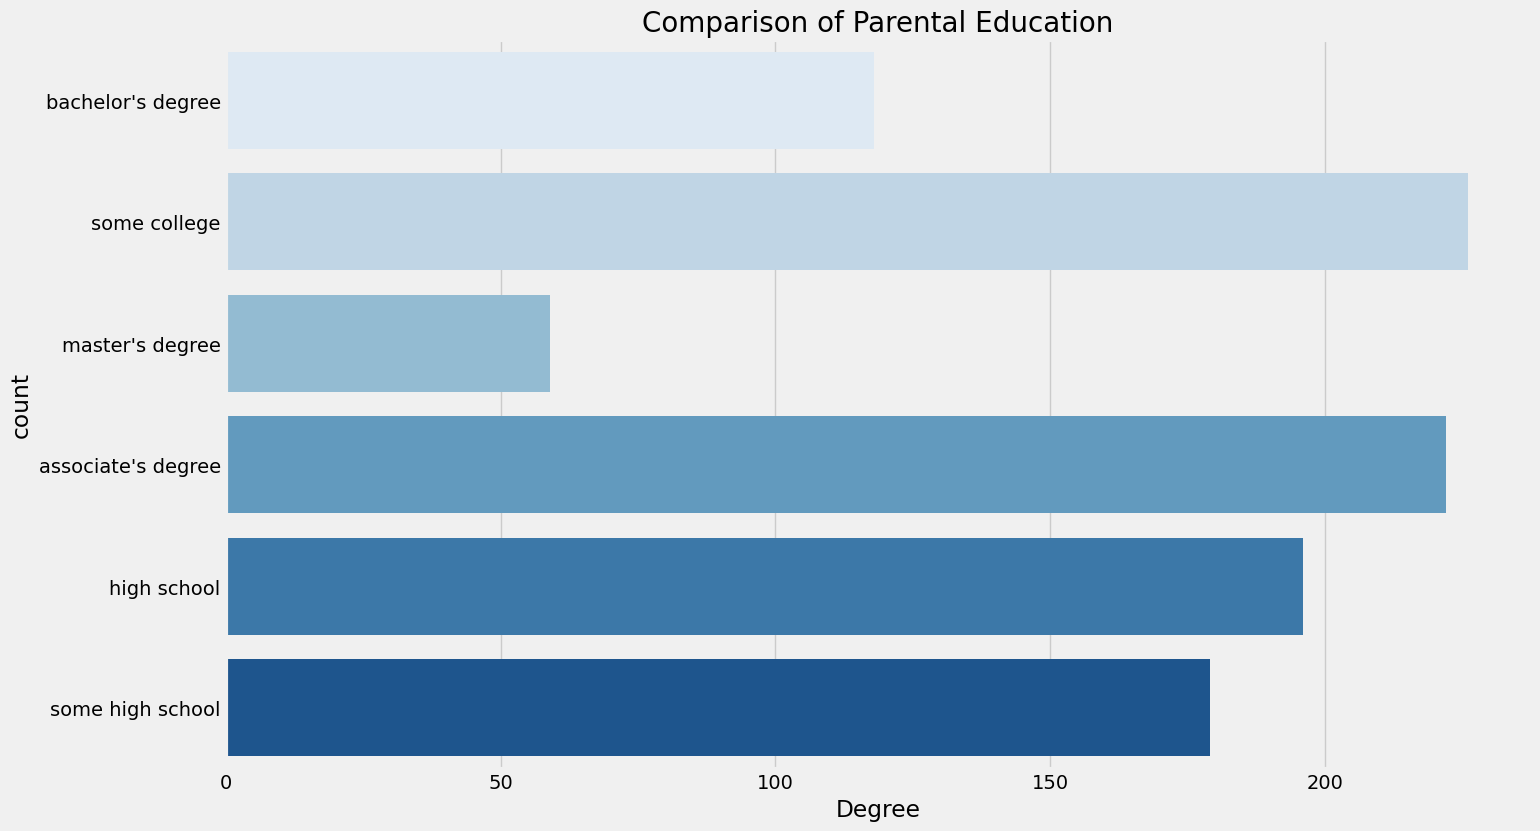

In [64]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

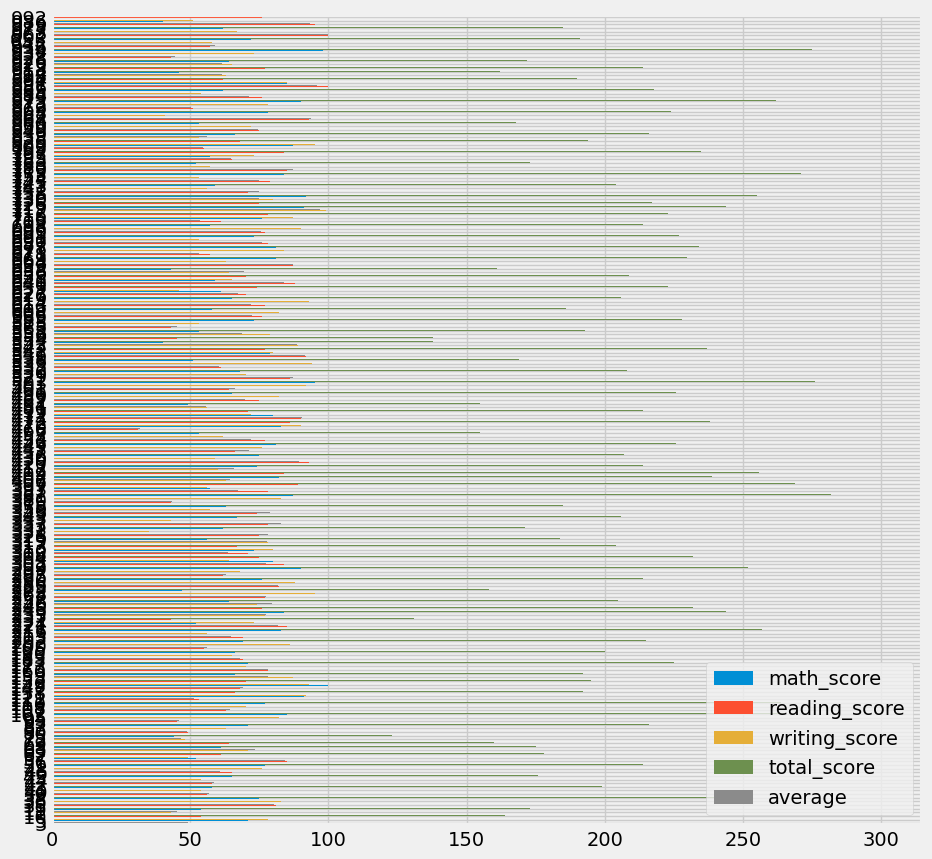

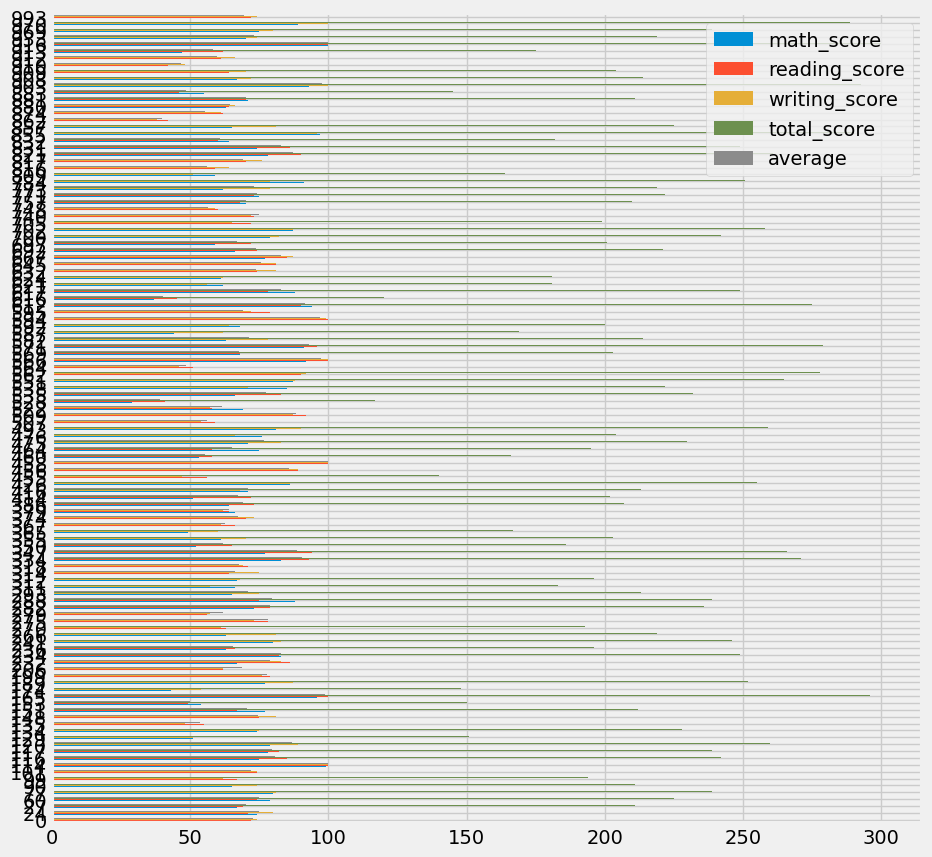

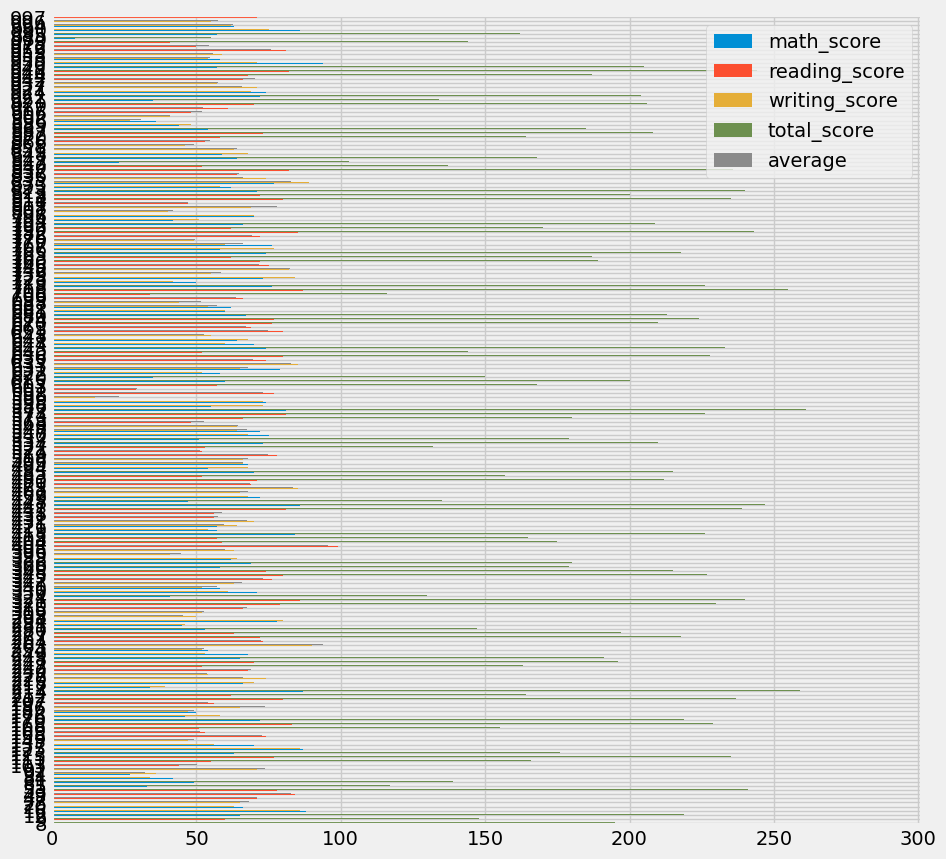

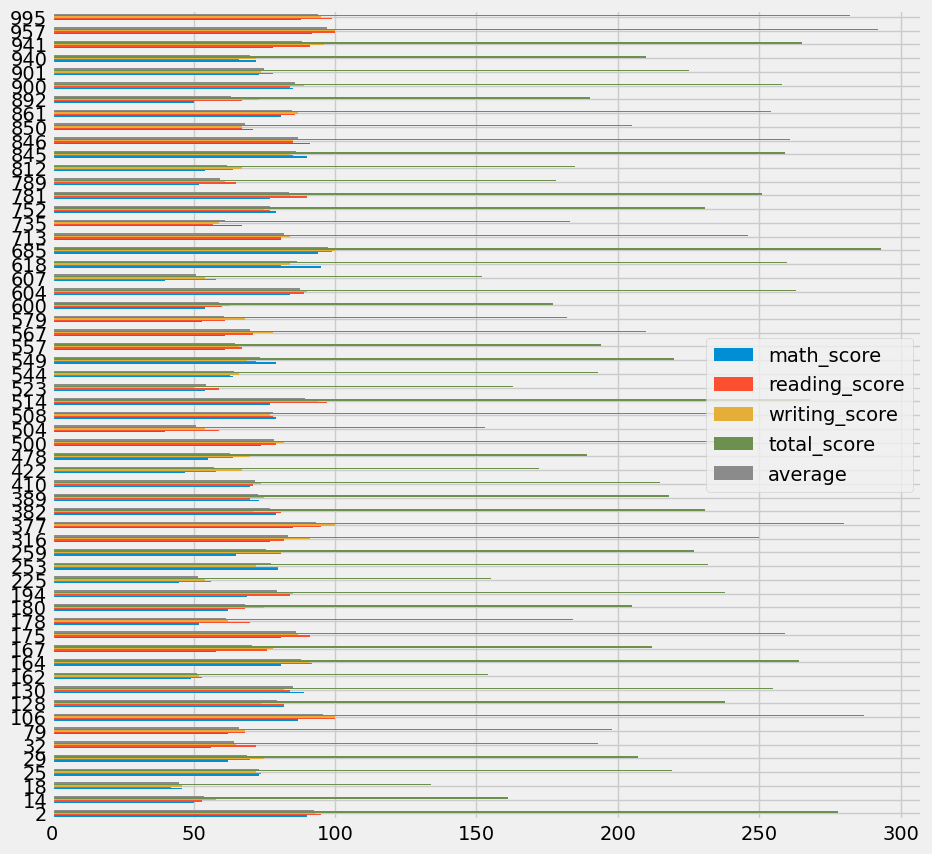

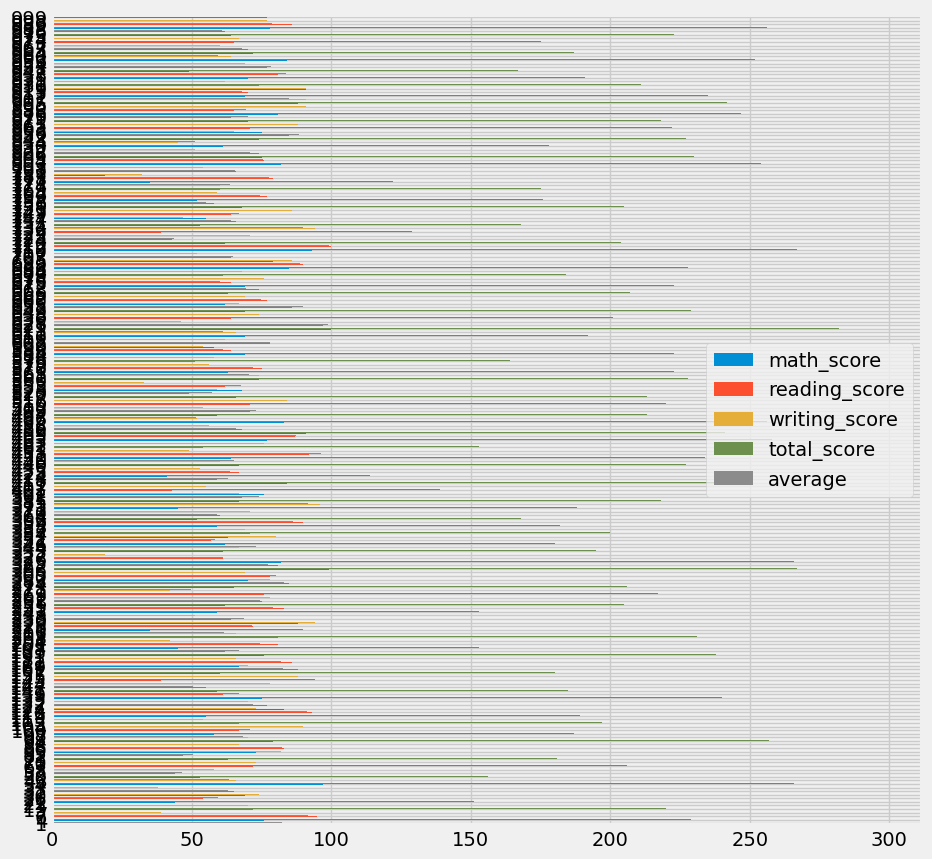

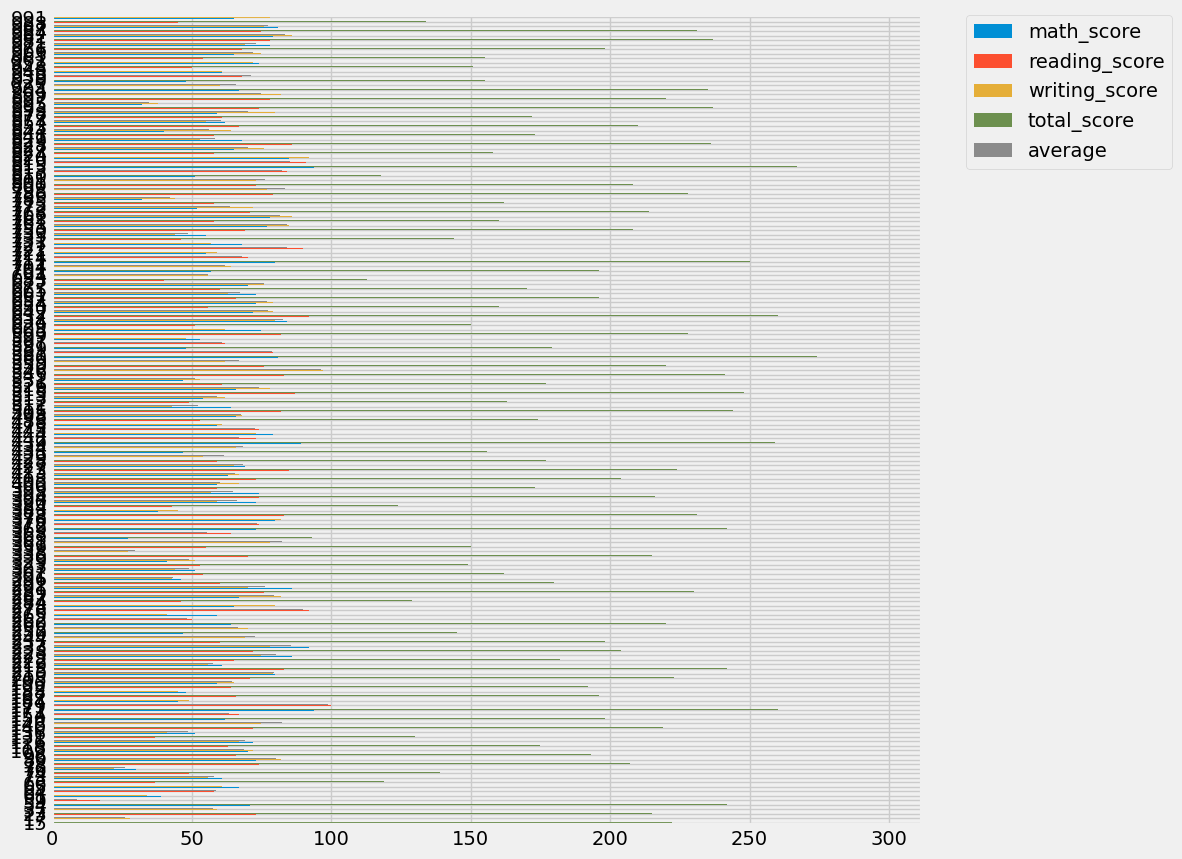

In [66]:
df.groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

LUNCH COLUMN
Which type of lunch is most common amoung students ?
What is the effect of lunch type on test results?
UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

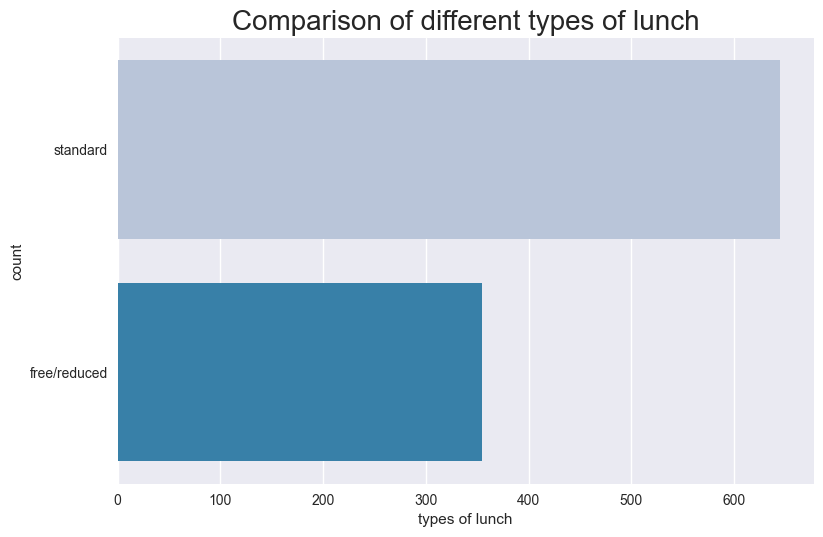

In [69]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-v0_8')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

In [68]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

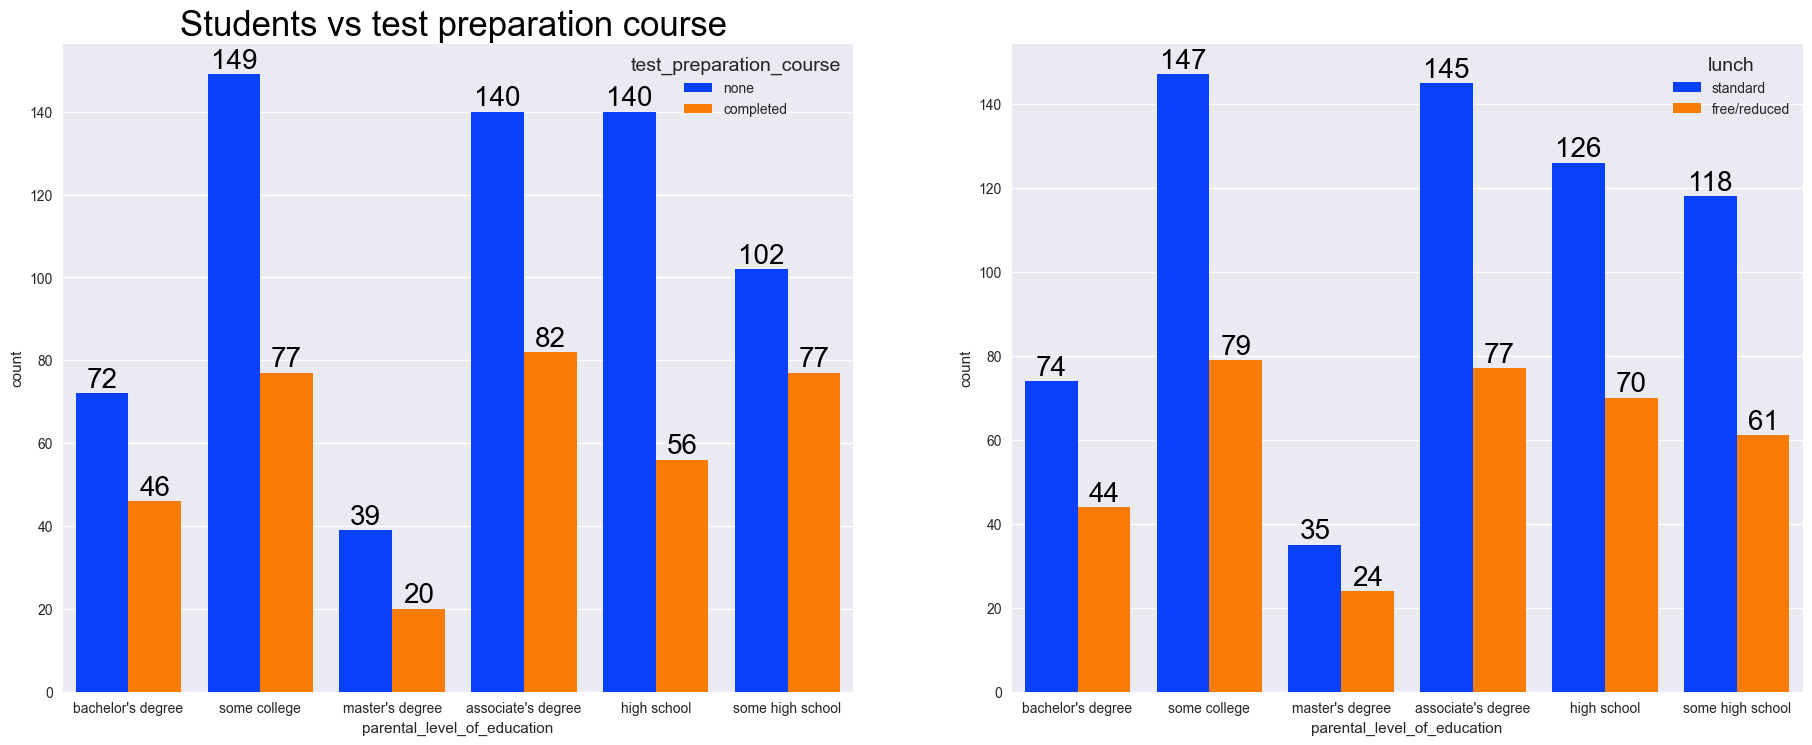

In [70]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

TEST PREPARATION COURSE COLUMN
Which type of lunch is most common amoung students ?
Is Test prepration course has any impact on student's performance ?
BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

<Axes: xlabel='lunch', ylabel='writing_score'>

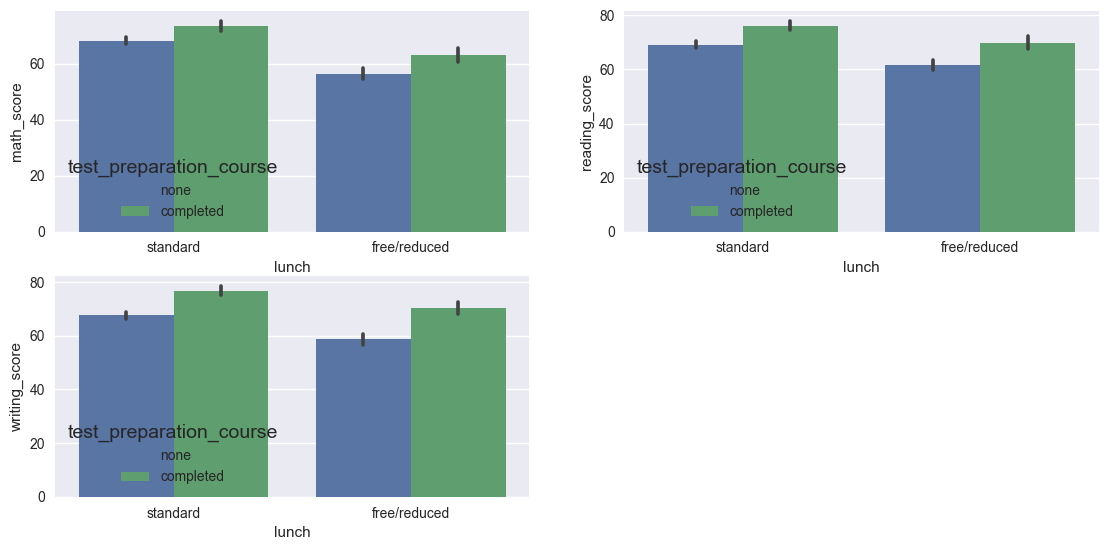

In [71]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

CHECKING OUTLIERS

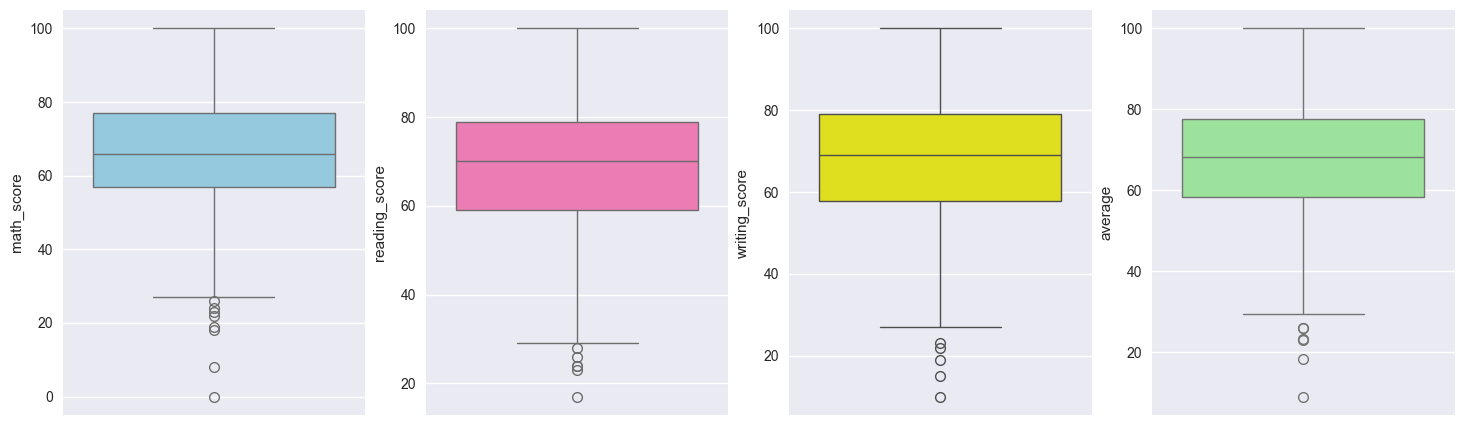

In [72]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

MUTIVARIATE ANALYSIS USING PAIRPLOT

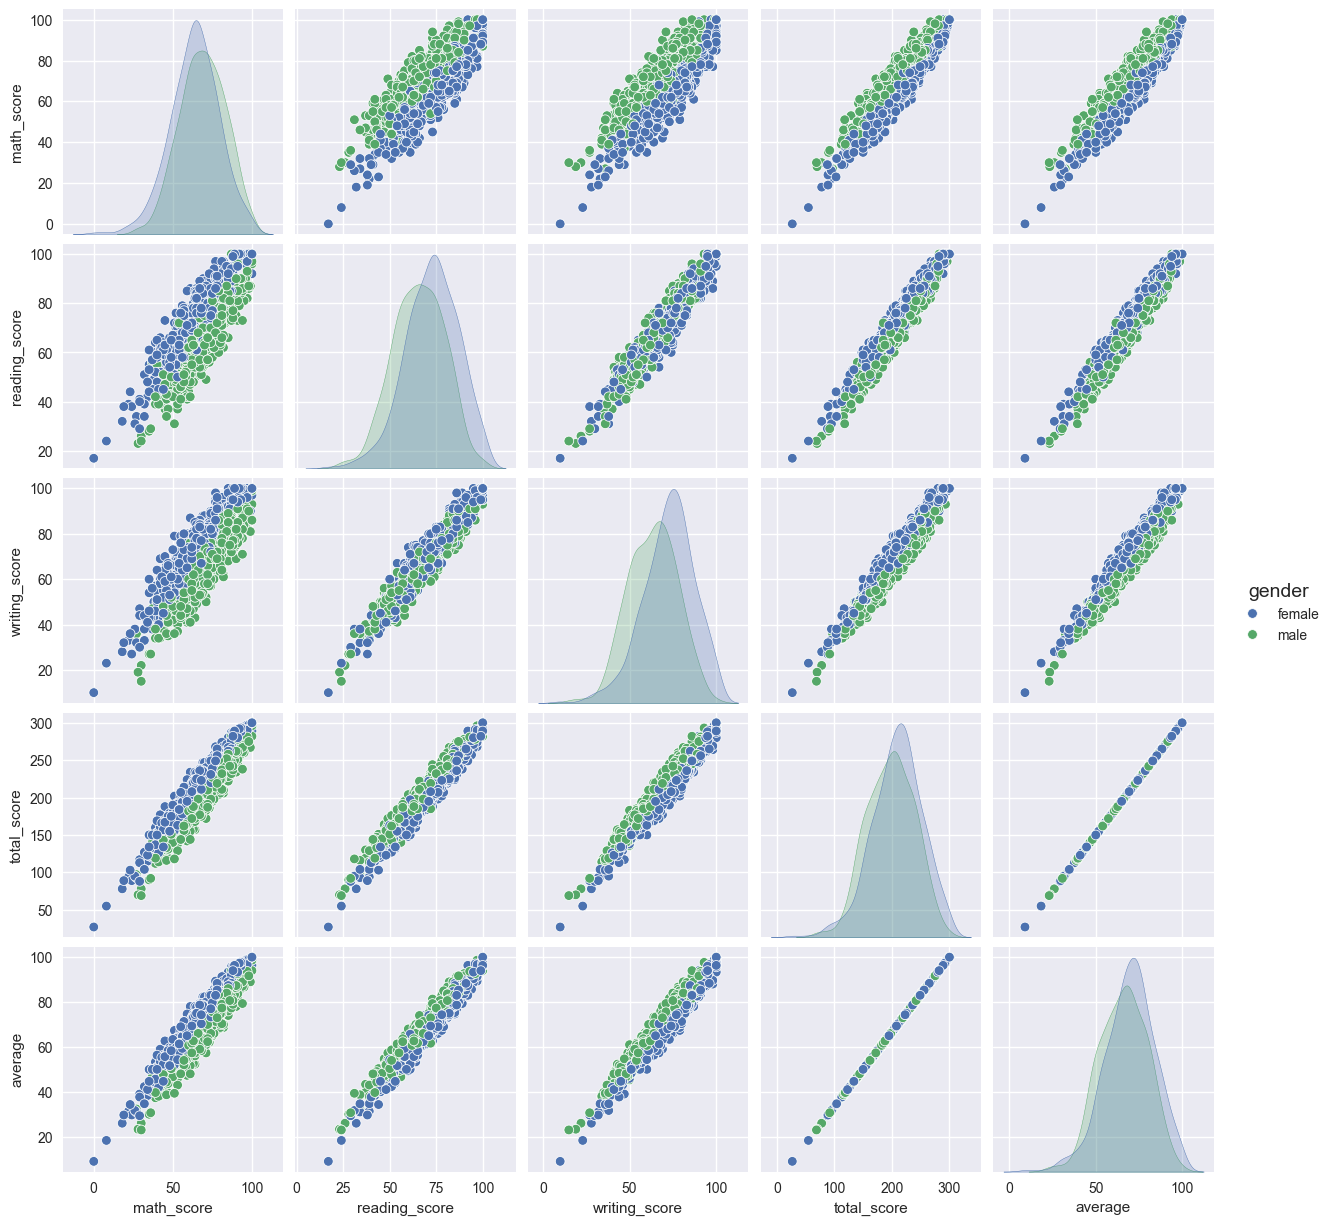

In [73]:
sns.pairplot(df,hue = 'gender')
plt.show()